<a id=Modeling></a>
## Modeling

We have attempted multiple rounds of modeling. Initially, we used only 

In [2]:
# Imprort libraries

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier,\
RandomForestRegressor, AdaBoostRegressor, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
pd.set_option("display.max_rows", 100)

sns.set()



Bad key "text.kerning_factor" on line 4 in
/Users/reemmokhtar/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [7]:
# Read in data

dataset = pd.read_csv('./data/large_train_sample.csv')

test_data = pd.read_csv('./data/test_data.csv')

dataset.columns=[c.lower().replace('-','_') for c in dataset.columns]
test_data.columns=[c.lower().replace('-','_') for c in test_data.columns]
categorical_features = ['workclass', 'education',
       'marital_status', 'occupation', 'relationship', 'sex', 'native_country']

In [8]:
# Impute

for c in categorical_features:
    dataset[c]=dataset[c].replace('?','MISSING')
    #test_data[c]=test_data[c].replace('?',None)

dataset[categorical_features]=dataset[categorical_features].astype(str)
test_data[categorical_features]=dataset[categorical_features].astype(str)

dataset=dataset.dropna()
#dataset['workclass']
#test_data=test_data.dropna()

In [9]:
# Check nulls

dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage              0
dtype: int64

In [10]:
# Strip and binary

dataset['wage']=dataset['wage'].astype(str)
dataset['wage']=dataset['wage'].str.strip()
dataset['wage']=dataset['wage'].map({'<=50K':0,'>50K':1})

In [11]:
# Assign values

negative_class = '<=50K'
positive_class = '>50K'

In [12]:
# Apply strip

dataset[categorical_features]=dataset[categorical_features].apply(lambda x: x.str.strip())
test_data[categorical_features]=test_data[categorical_features].apply(lambda x: x.str.strip())

In [13]:
# dataset['sex']=dataset['sex'].map({'Male':1,'Female':0})
# test_data['sex']=test_data['sex'].map({'Male':1,'Female':0})

In [14]:
# Dummify

sex = pd.get_dummies(dataset['sex'],drop_first=False, prefix='sex')
test_data_sex = pd.get_dummies(test_data['sex'],drop_first=False, prefix='sex')

In [15]:
# Transform labels

dataset['marital_status']=dataset['marital_status'].str.lower().str.replace('-','_')
test_data['marital_status']=test_data['marital_status'].str.lower().str.replace('-','_')

In [16]:
# Dummify

marital_status = pd.get_dummies(dataset['marital_status'],drop_first=False, prefix='ms')
test_data_ms = pd.get_dummies(test_data['marital_status'],drop_first=False, prefix='ms')

In [17]:
# Recategorize workclass

dataset['workclass_rebinned']=dataset['workclass'].map({'State-gov':"gov",
                                               'Federal-gov':"gov", 
                                               'Local-gov':"gov",
                                               'Without-pay':"no_work",
                                               'Never-worked':"no_work",
                                               "Private":"other",
                                               "Self-emp-not-inc":"other",
                                               "?":"other",
                                               "Self-emp-inc":"other",
                                              })

In [18]:
# Dummify

workclass = pd.get_dummies(dataset['workclass_rebinned'],drop_first=False,prefix='wc')
test_data_wc = pd.get_dummies(dataset['workclass_rebinned'],drop_first=False,prefix='wc')

In [19]:
# Create features list

features = ['age', 'education_num', 
        'capital_gain', 'hours_per_week',
       'wc_gov', 'wc_no_work',
        'ms_married_af_spouse',
       'ms_married_civ_spouse',
       'ms_married_spouse_absent', 'ms_never_married',
       'ms_separated', 'ms_widowed', 'sex_Male']

In [20]:
#features = ['age','education_num','sex','hours_per_week','capital_gain']+list(marital_status.columns)+list(workclass.columns)

In [21]:
# Check length

len(features)

13

In [22]:
# Join new features to df

dataset = dataset.join(marital_status).join(workclass).join(sex)
test_data = test_data.join(test_data_ms).join(test_data_wc).join(test_data_sex)

In [23]:
# View

dataset['ms_separated']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: ms_separated, Length: 32561, dtype: uint8

In [24]:
# Get columns

dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'wage',
       'workclass_rebinned', 'ms_divorced', 'ms_married_af_spouse',
       'ms_married_civ_spouse', 'ms_married_spouse_absent', 'ms_never_married',
       'ms_separated', 'ms_widowed', 'wc_gov', 'wc_no_work', 'wc_other',
       'sex_Female', 'sex_Male'],
      dtype='object')

In [25]:
# Import libraries and create pipeline for modeling

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,\
RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

pipes_dict = dict()
pipe_params = dict()
model_runs = dict()
model_scores = dict()
predicts_probs = dict()

#models = {'LOGREG':LogisticRegression()}
models = {'LOGREG_Jonna':LogisticRegression(),'RForest_Kemal':RandomForestClassifier()}

#           ,'KNN_Kemal':KNeighborsClassifier(),'Adaboost_Reem':AdaBoostClassifier(),
#           'SVC_Reem':SVC(probability=True),,'BagginClassifier_Jonna':BaggingClassifier(),}

X=dataset[features]
y=dataset['wage']

X_train, X_test,y_train, y_test =\
train_test_split(X,y,train_size=0.70,random_state=42)

sc = StandardScaler()
X_train_sc= sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

for mname, mvalue in models.items():    
    pipe_params[mname]={}

   
 
pipe_params['LOGREG_Jonna'] = {
    'LOGREG_Jonna__solver':['liblinear'],
    'LOGREG_Jonna__penalty':['l1'],#,'l2'],#,ExtraTreesRegressor()],
    'LOGREG_Jonna__C':[0.1]
}
   

pipe_params['BaggingClassifier_Jonna'] = {    
    'BaggingClassifier_Jonna__base_estimator':[None,RandomForestClassifier()],#,ExtraTreesRegressor()],
     'BTree__max_features':[1], 
     'BTree__max_samples':[1],
    'BTree__n_estimators':[10,50]#[5,10,20,50]
}
    
   

pipe_params['RForest_Kemal'] = {
    'RForest_Kemal__n_estimators':[100],
    #'RForest__criterion':["mse"],#,"mse", "mae"],
    #'RForest__splitter':["random"],#["best", "random"],
    'RForest_Kemal__min_samples_split':[4],#2,
    'RForest_Kemal__min_samples_leaf':[10],#,1,5,20],
    'RForest_Kemal__min_weight_fraction_leaf':[0.0],
    'RForest_Kemal__max_features':["sqrt"],#["auto", "sqrt", "log2"],
    'RForest_Kemal__max_leaf_nodes':[30],#,10,None],
    'RForest_Kemal__min_impurity_decrease':[0.0,0.5],
    'RForest_Kemal__ccp_alpha':[0.001]
}


pipe_params['Adaboost_Reem']=[{
    'Adaboost_Reem__base_estimator':[RandomForestClassifier()],#,ExtraTreesClassifier()],
    'Adaboost_Reem__n_estimators':[5],#,10,20],#[5,10,20],
    'Adaboost_Reem__learning_rate':[1],#[np.linspace(0.1,1,20)]0.5,
    'Adaboost_Reem__algorithm':['SAMME']
}]


pipe_params['SVC_Reem']=[{
    'SVC_Reem__kernel':['rbf'],#['linear', 'poly', 'rbf', 'sigmoid'],
    'SVC_Reem__degree':[2],#,3,4],
    'SVC_Reem__tol':[0.001],#[np.linspace(0.001,0.005,3),]
    'SVC_Reem__C':[0.5]#[np.linspace(0.1,1,20)]
}]
        
pipe_params['KNN_Kemal']=[{
    'KNN_Kemal__n_neighbors':[21],#19,5,10,30,40,50],
    'KNN_Kemal__algorithm':['brute'],#'auto', 'ball_tree', 'kd_tree',
    'KNN_Kemal__weights':['uniform'],#,'distance'],
    'KNN_Kemal__leaf_size':[30],#,40,50],
    'KNN_Kemal__p':[1],#,2],
    'KNN_Kemal__metric':['euclidean']#,'manhattan']
}]
    
    
for mname, mvalue in models.items():    
    pipes_dict[mname]=Pipeline([
        #('stsc', StandardScaler()),
        (mname,mvalue)
    ])
    model_runs[mname]=GridSearchCV(pipes_dict[mname],
                                   pipe_params[mname])
    
    print(f'Fitting {mname} on X_train_sc')
    model_runs[mname].fit(X_train_sc,y_train)
    preds_train = model_runs[mname].predict(X_train_sc)
    preds_test = model_runs[mname].predict(X_test_sc)
    pred_proba_train = [i[1] for i in model_runs[mname].predict_proba(X_train_sc)]
    pred_proba_test = [i[1] for i in model_runs[mname].predict_proba(X_test_sc)]
 
    model_scores[mname] ={
        'model':model_runs[mname],
        'train':model_runs[mname].score(X_train_sc,y_train),
        'test':model_runs[mname].score(X_test_sc,y_test),
        'Mean_CV_Score':model_runs[mname].best_score_,
        'f1score_train':f1_score(y_train,preds_train),
        'f1score_test':f1_score(y_test,preds_test),
        
        'preds_proba_train':pred_proba_train,
        'preds_proba_test':pred_proba_test
    }
    print(f"{mname} Scores:\n"
          f"Train:{model_scores[mname]['train']}\n"
          f"Test:{model_scores[mname]['test']}\n"
          f"F1 score Train:{model_scores[mname]['f1score_train']}\n"
          f"F1 score Test:{model_scores[mname]['f1score_test']}\n"
          f"Mean_CV_Score:{model_scores[mname]['Mean_CV_Score']}")
    print(f"Best Params {mname}:\n"
          f"{model_runs[mname].best_params_}")

Fitting LOGREG_Jonna on X_train_sc
LOGREG_Jonna Scores:
Train:0.8393295893295893
Test:0.8393899068481933
F1 score Train:0.625638928644449
F1 score Test:0.6177831912302071
Mean_CV_Score:0.83928585487472
Best Params LOGREG_Jonna:
{'LOGREG_Jonna__C': 0.1, 'LOGREG_Jonna__penalty': 'l1', 'LOGREG_Jonna__solver': 'liblinear'}
Fitting RForest_Kemal on X_train_sc
RForest_Kemal Scores:
Train:0.8453843453843454
Test:0.8465554304432388
F1 score Train:0.6080960854092526
F1 score Test:0.599304998663459
Mean_CV_Score:0.8445507832031323
Best Params RForest_Kemal:
{'RForest_Kemal__ccp_alpha': 0.001, 'RForest_Kemal__max_features': 'sqrt', 'RForest_Kemal__max_leaf_nodes': 30, 'RForest_Kemal__min_impurity_decrease': 0.0, 'RForest_Kemal__min_samples_leaf': 10, 'RForest_Kemal__min_samples_split': 4, 'RForest_Kemal__min_weight_fraction_leaf': 0.0, 'RForest_Kemal__n_estimators': 100}


In [26]:
# Check length

len(features)

13

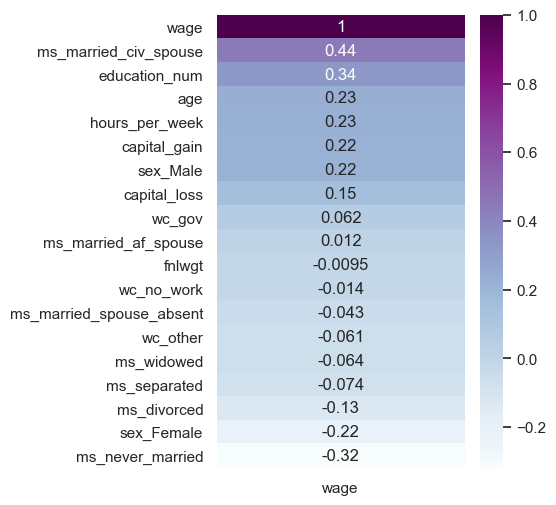

In [27]:
# View correlation

corr_coef=dataset.corr()
plt.figure(figsize=(4,6), dpi=100)
sns.heatmap(corr_coef[['wage']].sort_values('wage',ascending=False),annot=True,cmap="BuPu");

In [28]:
# Create scores

model_scores=pd.DataFrame(model_scores).T

In [29]:
# View scores

model_scores.drop(columns=['model','preds_proba_train','preds_proba_test']).sort_values(by='test', ascending=False)

,train,test,Mean_CV_Score,f1score_train,f1score_test
RForest_Kemal,0.845384,0.846555,0.844551,0.608096,0.599305
LOGREG_Jonna,0.83933,0.83939,0.839286,0.625639,0.617783


In [30]:
# Assign best model

chosen_model = model_scores.loc['RForest_Kemal','model']
test_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'ms_divorced',
       'ms_married_af_spouse', 'ms_married_civ_spouse',
       'ms_married_spouse_absent', 'ms_never_married', 'ms_separated',
       'ms_widowed', 'wc_gov', 'wc_no_work', 'wc_other', 'sex_Female',
       'sex_Male'],
      dtype='object')

In [31]:
# View probabilities

X_output_test = test_data[features]
X_output_test_sc = sc.transform(X_output_test)
predictions = pd.Series(chosen_model.predict(X_output_test_sc))
probabilities = pd.DataFrame([i[1] for i in chosen_model.predict_proba(X_output_test_sc)])
output_to_file = probabilities
output_to_file.columns=['wage']
output_to_file

,wage
0,0.039788
1,0.409858
2,0.072182
3,0.858896
4,0.199663
...,...
16276,0.585611
16277,0.081792
16278,0.179262
16279,0.398676


In [32]:
# Export data 

output_to_file.to_csv('./data/predictons_RForest.csv',index=False,header=True)

In [33]:
# View output file

output_to_file

,wage
0,0.039788
1,0.409858
2,0.072182
3,0.858896
4,0.199663
...,...
16276,0.585611
16277,0.081792
16278,0.179262
16279,0.398676


In [34]:
# Save models under directory (save models to disk)
    
#     import pickle
# import datetime
# current_time = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S_")
# file_names = [str(f'./models/Round_2_Kemal_{mtr}_{current_time}.pkl')
#               for mtr in model_scores.index]
# for fn,model in zip(file_names,model_scores.items()):
#     with open(fn, 'wb') as file:
#         pickle.dump(model, file)
#         file.close()

## ROC Curve

Using code obtained form https://github.com/bc123456/ROC

Train Accuracy: 0.7961565461565462 
Train AUC: 0.8189528057796571 
Train Confusion Matrix:
[[13375  3890]
 [  756  4771]]
Test Accuracy: 0.7926092742348244 
Test AUC: 0.8122636133713835 
Test Confusion Matrix:
[[5777 1678]
 [ 348 1966]]


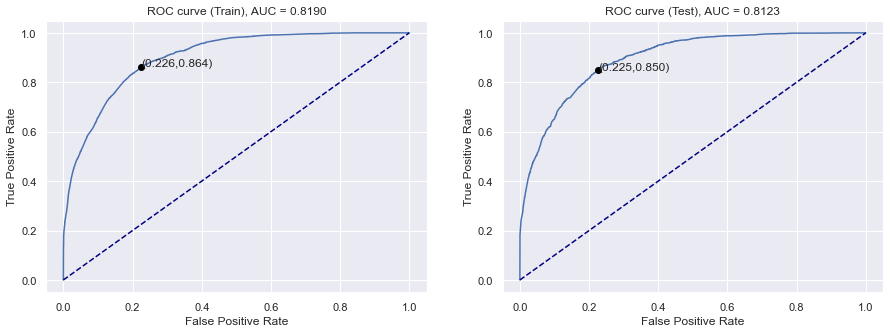

Best Threshold: 0.26985382928204643


In [35]:
# Create ROC Curve

sys.path.insert(0, os.path.abspath('./scripts/'))

import roc_mod

y_test_pos_prob = model_scores.loc['RForest_Kemal','preds_proba_test']
y_train_pos_prob = model_scores.loc['RForest_Kemal','preds_proba_train']
best_threshold = roc_mod.plot_ROC(y_train, y_train_pos_prob, y_test, y_test_pos_prob,fig_size=(15,5))

## Confusion Matrix

In [36]:
# Rethreshold

def rethreshold(threshold, probas):
    rethresholding = [1 if p
                      >= threshold else 0 
                      for p in probas]
    return rethresholding

**Train Confusion Matrix**

In [37]:
# Create confusion matrix

pd.DataFrame(confusion_matrix(y_train, rethreshold(0.2947530958189635,
                                      model_scores.loc['RForest_Kemal','preds_proba_train'])),
index=[f'Actual {positive_class}',f'Actual {negative_class}'],
columns=[f'Predicted {positive_class}',f'Predicted {negative_class}'])

,Predicted >50K,Predicted <=50K
Actual >50K,13741,3524
Actual <=50K,896,4631


**Test Confusion Matrix**

In [38]:
# Create confusion matrix

pd.DataFrame(confusion_matrix(y_test, 
                 rethreshold(0.2947530958189635,model_scores.loc['RForest_Kemal','preds_proba_test'])),
index=[f'Actual {positive_class}',f'Actual {negative_class}'],
columns=[f'Predicted {positive_class}',f'Predicted {negative_class}'])

,Predicted >50K,Predicted <=50K
Actual >50K,5931,1524
Actual <=50K,407,1907



<a id=Conclusions></a>
## Conclusions

Random Forest was the best performing model with a combination of only thirteen (13) features. The final Training Accuracy Score was 84.5% and the final Testing Accuracy Score was 84.6%.  Eight (8) of the features were engineered with six (6) features created from 'marial_status' and two (2) features engineered from 'workclass.' The remaining features came directly from the raw dataset. Two other models , Logistic Regression and Support Vector Classifier, scored similarly but had slightly lower scores and a Training Accuracy Score that was slightly greater than the Testing Accuracy Score. 
